In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [7]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5832550880859948843
]


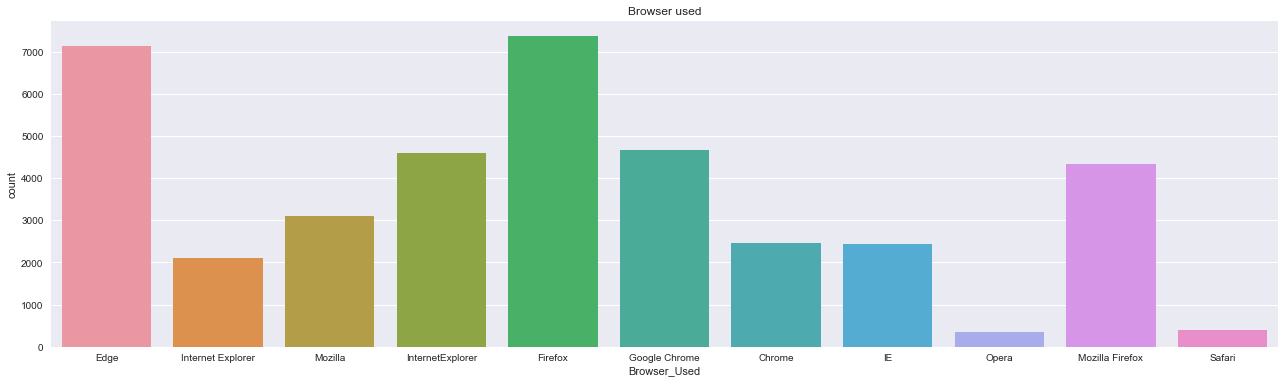

In [8]:
#first feature extracting from the most common variables
fig = plt.subplots(figsize=(22,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="Browser_Used", data=df)
plt.title('Browser used')

In [9]:
#combining the common names together
for i in range (len(df.index)):
    if df["Browser_Used"][i]in ['InternetExplorer','Internet Explorer']:
        df.loc[i,'Browser_Used']='IE'
    if df["Browser_Used"][i]in ['Mozilla','Mozilla Firefox']:
        df.loc[i,'Browser_Used']='Firefox'
    if df["Browser_Used"][i]in ['Google Chrome']:
        df.loc[i,'Browser_Used']='Chrome'        

In [10]:
df['Browser_Used'].value_counts()

Firefox    14787
IE          9130
Edge        7134
Chrome      7129
Safari       390
Opera        362
Name: Browser_Used, dtype: int64

In [11]:
dummy=pd.get_dummies(df['Browser_Used'],prefix="bu")

In [12]:
df=pd.concat([df,dummy],1)

In [13]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,bu_Chrome,bu_Edge,bu_Firefox,bu_IE,bu_Opera,bu_Safari
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,0,1,0,0,0,0
1,id10327,I stayed at the Crown Plaza April -- - April -...,IE,Mobile,not happy,0,0,0,1,0,0
2,id10328,I booked this hotel through Hotwire at the low...,Firefox,Tablet,not happy,0,0,1,0,0,0
3,id10329,Stayed here with husband and sons on the way t...,IE,Desktop,happy,0,0,0,1,0,0
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,0,1,0,0,0,0


In [14]:
df=df.drop(['bu_Opera','bu_Safari','Browser_Used'],1)

In [15]:
df['Device_Used'].value_counts()

Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64

In [16]:
df['Desktop']=np.where(df['Device_Used']=='Desktop',1,0)

In [17]:
df['Mobile']=np.where(df['Device_Used']=='Mobile',1,0)

In [18]:
df.head()

,User_ID,Description,Device_Used,Is_Response,bu_Chrome,bu_Edge,bu_Firefox,bu_IE,Desktop,Mobile
0,id10326,The room was kind of clean but had a VERY stro...,Mobile,not happy,0,1,0,0,0,1
1,id10327,I stayed at the Crown Plaza April -- - April -...,Mobile,not happy,0,0,0,1,0,1
2,id10328,I booked this hotel through Hotwire at the low...,Tablet,not happy,0,0,1,0,0,0
3,id10329,Stayed here with husband and sons on the way t...,Desktop,happy,0,0,0,1,1,0
4,id10330,My girlfriends and I stayed here to celebrate ...,Tablet,not happy,0,1,0,0,0,0


In [19]:
df['Is_Response'].value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [20]:
df['Is_Response_hppy']=np.where(df['Is_Response']=='happy',1,0)

In [21]:
df.head()

,User_ID,Description,Device_Used,Is_Response,bu_Chrome,bu_Edge,bu_Firefox,bu_IE,Desktop,Mobile,Is_Response_hppy
0,id10326,The room was kind of clean but had a VERY stro...,Mobile,not happy,0,1,0,0,0,1,0
1,id10327,I stayed at the Crown Plaza April -- - April -...,Mobile,not happy,0,0,0,1,0,1,0
2,id10328,I booked this hotel through Hotwire at the low...,Tablet,not happy,0,0,1,0,0,0,0
3,id10329,Stayed here with husband and sons on the way t...,Desktop,happy,0,0,0,1,1,0,1
4,id10330,My girlfriends and I stayed here to celebrate ...,Tablet,not happy,0,1,0,0,0,0,0


In [22]:
df=df.drop(['Device_Used','Is_Response'],1)

# After sorting done now will work on the Text part

In [2]:
import nltk
import string 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [43]:
# A composite function created for cleaning the text data.
def text_process(mess):
   # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    ps=PorterStemmer()
    # Now just remove any stopwords and steaming
    k1=[ps.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]   
    return ' '.join(k1)
df['Description1']=df['Description'].apply(text_process).astype('str')

In [ ]:
df['Description1']=df['Description'].apply(text_process).astype('str')

In [ ]:
df.to_csv('temp.csv', index=False)

In [116]:
from textblob import TextBlob

In [ ]:
df['polarity'] = df['Description1'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['Description1'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df=df.drop(['sentiment'],1)

In [ ]:
df.head()

In [6]:
df.to_csv('temp.csv', index=False)

NameError: name 'df' is not defined

In [104]:
df=pd.read_csv('temp.csv',encoding = "ISO-8859-1")


# lets know little birt about the text 

In [105]:
df['desc_len']=df['Description1'].apply(len)

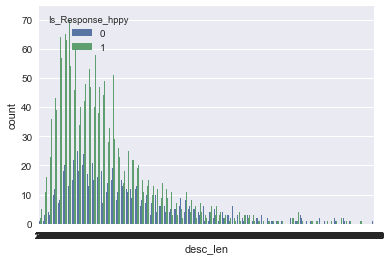

In [71]:
sns.countplot(hue="Is_Response_hppy", x="desc_len",data=df);

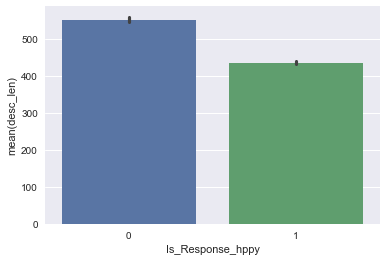

In [43]:
sns.barplot(x="Is_Response_hppy", y="desc_len",data=df);

it seems leanght is separating happy and unhappy people so can use as a feature.

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features = 30, max_df = 1.0, min_df = 1, 
                       use_idf = True,analyzer = 'word', ngram_range = (1,1))
X = vect.fit_transform(df['Description1'])
tx1 = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())


In [107]:
tx1.head()

,also,area,bed,breakfast,clean,comfort,day,desk,even,get,...,park,place,room,servic,staff,stay,time,us,walk,would
0,0.000000,0.000000,0.000000,0.484531,0.423308,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.257115,0.000000,0.000000,0.587725,0.0,0.000000,0.000000,0.417746
1,0.000000,0.243257,0.204708,0.000000,0.000000,0.22794,0.227256,0.000000,0.238230,0.000000,...,0.000000,0.0,0.229839,0.000000,0.328011,0.262688,0.0,0.000000,0.000000,0.373429
2,0.345207,0.000000,0.000000,0.156344,0.000000,0.00000,0.164063,0.173671,0.000000,0.156805,...,0.177657,0.0,0.580746,0.155593,0.118400,0.000000,0.0,0.167045,0.000000,0.269589
3,0.000000,0.000000,0.285759,0.000000,0.000000,0.00000,0.000000,0.000000,0.332554,0.000000,...,0.000000,0.0,0.481261,0.601717,0.000000,0.183348,0.0,0.000000,0.301849,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.103365,0.00000,0.000000,0.000000,0.000000,0.118663,...,0.134443,0.0,0.188350,0.588731,0.000000,0.502294,0.0,0.252825,0.000000,0.306020


In [108]:
df3= pd.concat([df, tx1], axis=1)
df3=df3.drop(['Description1'],1)

In [109]:
df3.shape

(38932, 42)

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 42 columns):
User_ID             38932 non-null object
Description         38932 non-null object
bu_Chrome           38932 non-null int64
bu_Edge             38932 non-null int64
bu_Firefox          38932 non-null int64
bu_IE               38932 non-null int64
Desktop             38932 non-null int64
Mobile              38932 non-null int64
Is_Response_hppy    38932 non-null int64
polarity            38932 non-null float64
subjectivity        38932 non-null float64
desc_len            38932 non-null int64
also                38932 non-null float64
area                38932 non-null float64
bed                 38932 non-null float64
breakfast           38932 non-null float64
clean               38932 non-null float64
comfort             38932 non-null float64
day                 38932 non-null float64
desk                38932 non-null float64
even                38932 non-null float64
get   

In [110]:
y=df3['Is_Response_hppy']

In [111]:
df3=df3.drop(['User_ID','Description','Is_Response_hppy'],1)

In [32]:
#use random forest since it has better accuracy

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df3,y, test_size=.25,random_state=12)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from time import time

grid_times = {}
clf = RandomForestClassifier(random_state = 84)

features = X_train.columns

# I commented this out after running once locally since this block of code takes a long time to run

for number in np.arange(2, 600, 50):
    
    param = np.arange(1,number,10)
    param_grid = {"n_estimators": param,
                  "criterion": ["gini", "entropy"]}
    
    grid_search = GridSearchCV(clf, param_grid = param_grid)
    
    t0 = time()
    grid_search.fit(X_train[features], y_train)
    compute_time = time() - t0
    grid_times[len(grid_search.grid_scores_)] = time() - t0
    
grid_times = pd.DataFrame.from_dict(grid_times, orient = 'index')


In [35]:
grid_times

NameError: name 'grid_times' is not defined

In [113]:
X_train.shape

(29199, 39)

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [114]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29199 entries, 1075 to 14155
Data columns (total 39 columns):
bu_Chrome       29199 non-null int64
bu_Edge         29199 non-null int64
bu_Firefox      29199 non-null int64
bu_IE           29199 non-null int64
Desktop         29199 non-null int64
Mobile          29199 non-null int64
polarity        29199 non-null float64
subjectivity    29199 non-null float64
desc_len        29199 non-null int64
also            29199 non-null float64
area            29199 non-null float64
bed             29199 non-null float64
breakfast       29199 non-null float64
clean           29199 non-null float64
comfort         29199 non-null float64
day             29199 non-null float64
desk            29199 non-null float64
even            29199 non-null float64
get             29199 non-null float64
go              29199 non-null float64
good            29199 non-null float64
great           29199 non-null float64
help            29199 non-null float64
hotel

In [115]:
tf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29404 entries, 0 to 29403
Data columns (total 37 columns):
bu_Chrome     29404 non-null uint8
bu_Edge       29404 non-null uint8
bu_Firefox    29404 non-null uint8
bu_IE         29404 non-null uint8
Desktop       29404 non-null int32
Mobile        29404 non-null int32
desc_len      29404 non-null int64
also          29404 non-null float64
area          29404 non-null float64
bed           29404 non-null float64
breakfast     29404 non-null float64
clean         29404 non-null float64
comfort       29404 non-null float64
day           29404 non-null float64
desk          29404 non-null float64
even          29404 non-null float64
get           29404 non-null float64
go            29404 non-null float64
good          29404 non-null float64
great         29404 non-null float64
help          29404 non-null float64
hotel         29404 non-null float64
like          29404 non-null float64
locat         29404 non-null float64
nice          294

In [53]:
# now i will implement ddep learning to see if i can get anything better 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout




In [54]:
clf=Sequential()
clf.add(Dense(units=16, kernel_initializer="uniform",activation='relu',input_dim=39)) 
clf.add(Dense(units=8, kernel_initializer="uniform",activation='relu'))
clf.add(Dense(units=1, kernel_initializer="uniform",activation='sigmoid'))
clf.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
clf.fit(X_train,y_train,epochs=100, batch_size=15)

Epoch 1/100
29199/29199 [==============================] - 3s - loss: 0.4777 - acc: 0.7726     - ETA: 0s - loss: 0.4790 - acc: 0.77
Epoch 2/100
29199/29199 [==============================] - 1s - loss: 0.4382 - acc: 0.7997     - ETA: 0s - loss: 0.4427 - acc:  - ETA: 0s - loss: 0.4422 -
Epoch 3/100
29199/29199 [==============================] - 1s - loss: 0.4302 - acc: 0.8039     - ETA: 0s - loss: 0.4290 -
Epoch 4/100
29199/29199 [==============================] - 1s - loss: 0.4269 - acc: 0.8066     - ETA: 0s - loss: 0.4269 - acc: 0
Epoch 5/100
29199/29199 [==============================] - 1s - loss: 0.4257 - acc: 0.8064     - ETA: 1s - loss
Epoch 6/100
29199/29199 [==============================] - 1s - loss: 0.4240 - acc: 0.8075     
Epoch 7/100
29199/29199 [==============================] - 1s - loss: 0.4234 - acc: 0.8088     - ETA: 0s - loss: 0.4241 - acc:  - ETA: 0s - loss: 0.421
Epoch 8/100
29199/29199 [==============================] - 1s - loss: 0.4217 - acc: 0.8101     
Epoch 

In [56]:
y=clf.predict_classes(X_test)

4512/9733 [============>.................] - ETA: 0s

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y,y_test)

0.79430802424740576

If your computer is fast then only run..
# checking the stability of the model by kfold 
my computer took 3 hrs for thi so keeping it in comment so i dont run it again by mistake but it works n 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
def build_classifier():
    clf=Sequential()
    clf.add(Dense(units=16, kernel_initializer="uniform",activation='relu',input_dim=39)) 
    clf.add(Dense(units=8, kernel_initializer="uniform",activation='relu'))
    clf.add(Dense(units=1, kernel_initializer="uniform",activation='sigmoid'))
    clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return clf

clf=KerasClassifier(build_fn=build_classifier,batch_size=10, nb_epoch=100)
accuracies=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,n_jobs=-1)
mean=accuracies.mean()
variance=accuracies.std()

In [117]:
tf=pd.read_csv('test.csv')

In [118]:
for i in range (len(tf.index)):
    if tf["Browser_Used"][i]in ['InternetExplorer','Internet Explorer']:
        tf.loc[i,'Browser_Used']='IE'
    if tf["Browser_Used"][i]in ['Mozilla','Mozilla Firefox']:
        tf.loc[i,'Browser_Used']='Firefox'
    if tf["Browser_Used"][i]in ['Google Chrome']:
        tf.loc[i,'Browser_Used']='Chrome'    

dummy=pd.get_dummies(tf['Browser_Used'],prefix="bu")
tf=pd.concat([tf,dummy],1)
tf=tf.drop(['bu_Opera','bu_Safari','Browser_Used'],1)
tf['Desktop']=np.where(tf['Device_Used']=='Desktop',1,0)
tf['Mobile']=np.where(tf['Device_Used']=='Mobile',1,0)




In [119]:
import nltk
import string 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [91]:
tf['Description']=tf['Description'].apply(text_process).astype('str')


NameError: name 'text_process' is not defined

In [92]:
tf.to_csv('temp1.csv', index=False)

In [121]:
tf=pd.read_csv('temp1.csv',encoding = "ISO-8859-1")

In [122]:
tf['polarity'] = tf['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)
tf['subjectivity'] = tf['Description'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
tf['desc_len']=tf['Description'].apply(len)

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
#vect = TfidfVectorizer(max_features = 30, max_df = 1.0, min_df = 1, use_idf = True,analyzer = 'word', ngram_range = (1,1))
dX = vect.transform(tf['Description'])
tx2 = pd.DataFrame(dX.toarray(), columns=vect.get_feature_names())


In [124]:
tf3= pd.concat([tf, tx2], axis=1)

In [125]:
tf3.shape

(29404, 42)

In [126]:
tf3.head()

,User_ID,Description,Device_Used,bu_Chrome,bu_Edge,bu_Firefox,bu_IE,Desktop,Mobile,polarity,...,park,place,room,servic,staff,stay,time,us,walk,would
0,id80132,Looking for a motel in close proximity to TV t...,Mobile,0,0,1,0,0,1,-0.053333,...,0.000000,0.970417,0.241436,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,id80133,Walking distance to Madison Square Garden and ...,Desktop,0,0,0,1,1,0,0.203974,...,0.000000,0.000000,0.389277,0.0,0.277775,0.000000,0.0,0.0,0.0,0.000000
2,id80134,Visited Seattle on business. Spent - nights in...,Tablet,0,0,0,1,0,0,0.272917,...,0.289728,0.000000,0.270599,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,id80135,This hotel location is excellent and the rooms...,Mobile,0,1,0,0,0,1,0.032092,...,0.000000,0.000000,0.000000,0.0,0.396383,0.158722,0.0,0.0,0.0,0.676903
4,id80136,This hotel is awesome I love the service Antho...,Mobile,0,0,1,0,0,1,0.850000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [127]:
test_final=pd.DataFrame()
test_final['User_ID']=tf3['User_ID']

In [128]:
tf3=tf3.drop(['User_ID','Description','Device_Used'],1)

In [129]:
tf3=sc.transform(tf3)

In [130]:
final=clf.predict_classes(tf3)

23904/29404 [=======================>......] - ETA: 0s

In [131]:
test_final['rfc']=final

In [132]:
test_final.to_csv('data.csv')

In [7]:
testq=pd.read_csv('DATA.CSV')

# Just adjusting as per the submission format. Not part of code. 

In [4]:
testq.head()

,Unnamed: 0,User_ID,rfc
0,0,id80132,1
1,1,id80133,1
2,2,id80134,1
3,3,id80135,0
4,4,id80136,1


In [8]:
testq['Is_Response']= np.where(testq['rfc']==1,'happy','not happy')

In [9]:
testq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29404 entries, 0 to 29403
Data columns (total 4 columns):
Unnamed: 0     29404 non-null int64
User_ID        29404 non-null object
rfc            29404 non-null int64
Is_Response    29404 non-null object
dtypes: int64(2), object(2)
memory usage: 919.0+ KB


In [11]:
testq=testq.drop(['rfc','Unnamed: 0'],1)

In [13]:
testq.to_csv('answer.csv', index=False)